<a href="https://colab.research.google.com/github/vincentzouras/cse337/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [91]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'axes', 'rand', 'norm', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [92]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

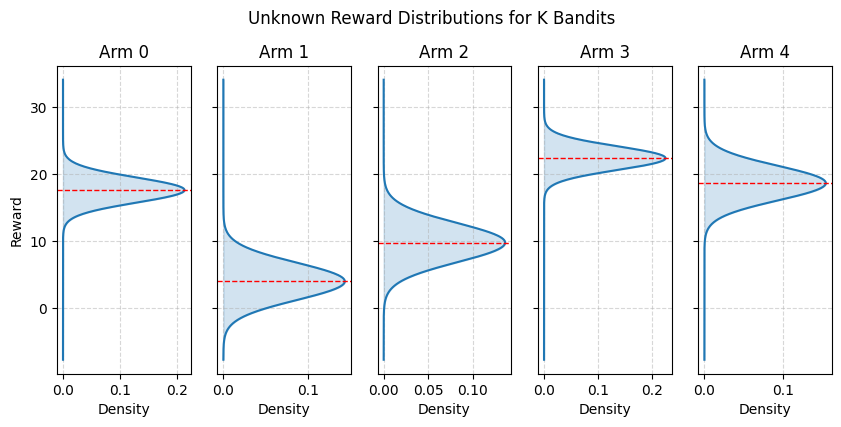

In [93]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

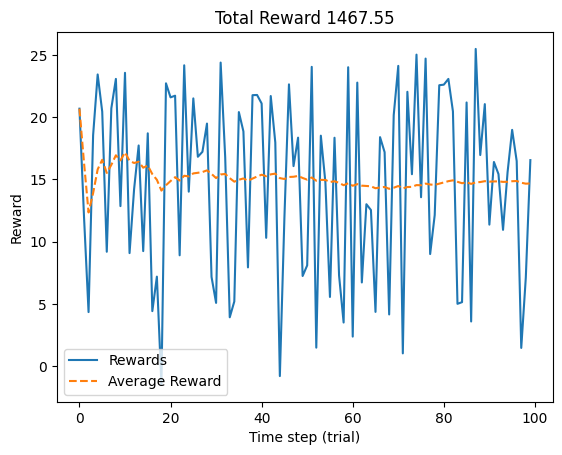

In [94]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

chosen arm: 3


Text(0, 0.5, 'Reward')

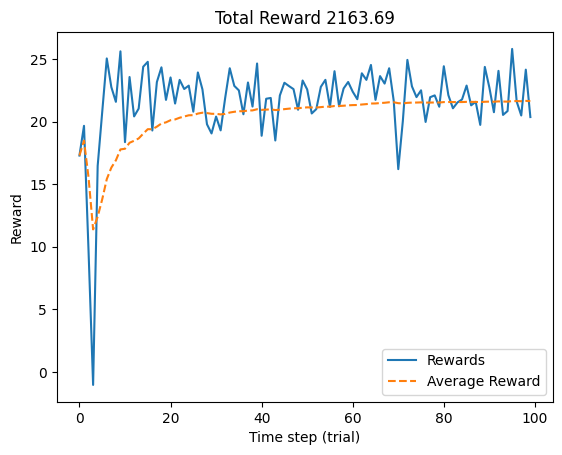

In [95]:
# Rewards
rewards = []

explore = 4
explore_max = 0
explore_max_a = -1

# For T trials, chose a random arm
for t in range(T):
  # test each arm
  if explore >= 0:
    a = explore
    explore -= 1
  else:
    a = explore_max_a


  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  if r > explore_max and explore >= 0:
    explore_max = r
    explore_max_a = a

  rewards.append(r)

print("chosen arm:", a)
# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



# 1 greedy

chosen arm: 3


Text(0, 0.5, 'Reward')

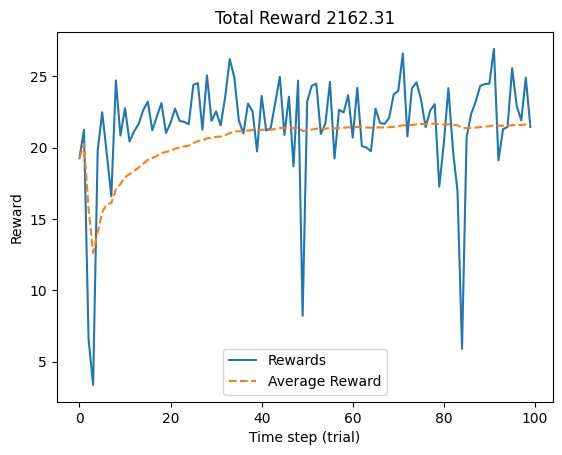

In [220]:
# Rewards
rewards = []

explore = 4
explore_max = 0
explore_max_a = -1
e = 0.1

# For T trials, chose a random arm
for t in range(T):
  # test each arm
  if explore >= 0:
    a = explore
    explore -= 1
  else:
    if np.random.random() <= e:
      a = np.random.randint(0, K-1)
    else:
      a = explore_max_a


  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  if r > explore_max and explore >= 0:
    explore_max = r
    explore_max_a = a

  rewards.append(r)

print("chosen arm:", a)
# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# 2 epsilon greedy

chosen arm: 3


Text(0, 0.5, 'Reward')

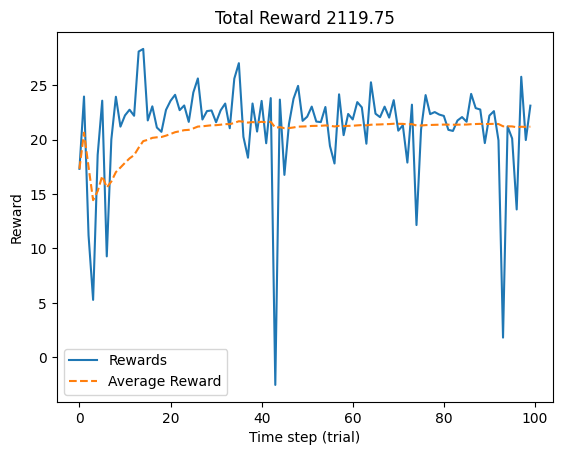

In [219]:
# Rewards
rewards = []

explore = 4
explore_max = 0
explore_max_a = -1
e = 0.1

# For T trials, chose a random arm
for t in range(T):
  # test each arm
  if explore >= 0:
    a = explore
    explore -= 1
  else:
    if np.random.random() <= e:
      a = np.random.randint(0, K-1)
    else:
      a = explore_max_a


  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  if r > explore_max and explore >= 0:
    explore_max = r
    explore_max_a = a

  rewards.append(r)

print("chosen arm:", a)
# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. If we use an epsilon value of 0.1, over the course of many runs we will on average get a higher result, but each run will be slightly lower. However, if we use a small epsilon of 0.001 then we are able to get higher means for each individual run but there is a greater chance we are using an inefficient path which lowers our average across many runs.
1. Purely greedy would be inefficient because we would be sticking with an originally optimal answer that may have now been shifted to be unoptimal.
1. A smaller epsilon will perform more exploitation and less exploration, whereas a greater epsilon will prioritize exploration and less exploitation.
1. This would **decrease** the effectiveness of the epsilon-greedy strategy because the chance that you randomly pick a better arm is now much lower.